In [ ]:
from IPython.display import display, Markdown
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

## Import Data



In [ ]:
country = ['AUS','BRA','CAN','CHN','GBR','IND','JPN','SGP','USA']
manufacture = {}
service = {}
for con in country:
  manufacture[con] = pd.read_excel('Manufacturing.1.xlsx',sheet_name = con)
  manufacture[con] = manufacture[con].replace('..',np.nan)
  service[con] = pd.read_excel('Service.1.xlsx',sheet_name = con)
  service[con] = service[con].replace('..',np.nan)

## Univariate Time Series Analysis

In [ ]:
service['USA']

,Year,Employment_in_services_male,Urban_population_growth,Net_trade_in_goods_services,Foreign_direct_investment,Mobile_cellular_subscriptions,Secure_Internet_servers,School_enrollment_tertiary,Population_labor_rate,Population_density,...,Employment_in_industry_%_of_total_employment,GDP_per_capita_current_USD,Final_consumption,Primary_completion_rate,Educational_attainment,Individuals_using_the_Internet_%_of_population,Poverty_headcount_ratio,Access_finance,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Services_value_added_%_of_GDP
0,1960,NaN,NaN,NaN,NaN,0.0,NaN,NaN,60.193195,NaN,...,NaN,3007.123445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,NaN,2.200571,NaN,NaN,NaN,NaN,NaN,60.006709,20.055880,...,NaN,3066.562869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,NaN,2.076494,NaN,NaN,NaN,NaN,NaN,59.990825,20.366723,...,NaN,3243.843078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,NaN,1.970559,NaN,NaN,NaN,NaN,NaN,60.098707,20.661953,...,NaN,3374.515171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,NaN,1.913437,NaN,NaN,NaN,NaN,NaN,60.268451,20.950959,...,NaN,3573.941185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,68.870003,0.871785,-5.127350e+11,1.954982,400000000.0,30338.033467,88.167389,65.722106,35.542495,...,19.730000,59914.777797,1.596980e+13,98.832199,NaN,87.274889,1.2,NaN,NaN,77.031393
58,2018,68.750000,0.767437,-5.809560e+11,1.046005,348242000.0,65833.810325,88.299179,65.483306,35.730096,...,19.870001,62805.253758,1.678295e+13,100.092697,96.029373,88.498903,1.0,NaN,NaN,76.739738
59,2019,68.809998,0.701868,-5.763380e+11,1.472654,355695000.0,123980.019575,87.888710,65.241077,35.893176,...,19.910000,65094.799429,1.740259e+13,100.489052,NaN,89.430285,1.0,NaN,NaN,77.199503
60,2020,NaN,1.209501,-6.766790e+11,0.712711,351477000.0,140808.319539,NaN,64.997327,36.239845,...,NaN,63027.679527,1.712556e+13,NaN,96.460770,90.900000,NaN,NaN,NaN,80.136410


In [ ]:
# get target value
manufacture_y = {}
service_y = {}
def get_target_val(country, is_service):
  if not is_service:
    target = manufacture[country][['Manufacturing_value added_%_of_GDP','Year']]
    target.index = target['Year']
    del target['Year']
    target_trim = target[~target['Manufacturing_value added_%_of_GDP'].isna()]
    return target_trim
  else:
    target = service[country][['Services_value_added_%_of_GDP','Year']]
    target.index = target['Year']
    del target['Year']
    target_trim = target[~target['Services_value_added_%_of_GDP'].isna()]
    return target_trim
for con in country:
  manufacture_y[con] = get_target_val(con, False)
  service_y[con] = get_target_val(con, True)

### Target Value Visualization

#### Manufacture

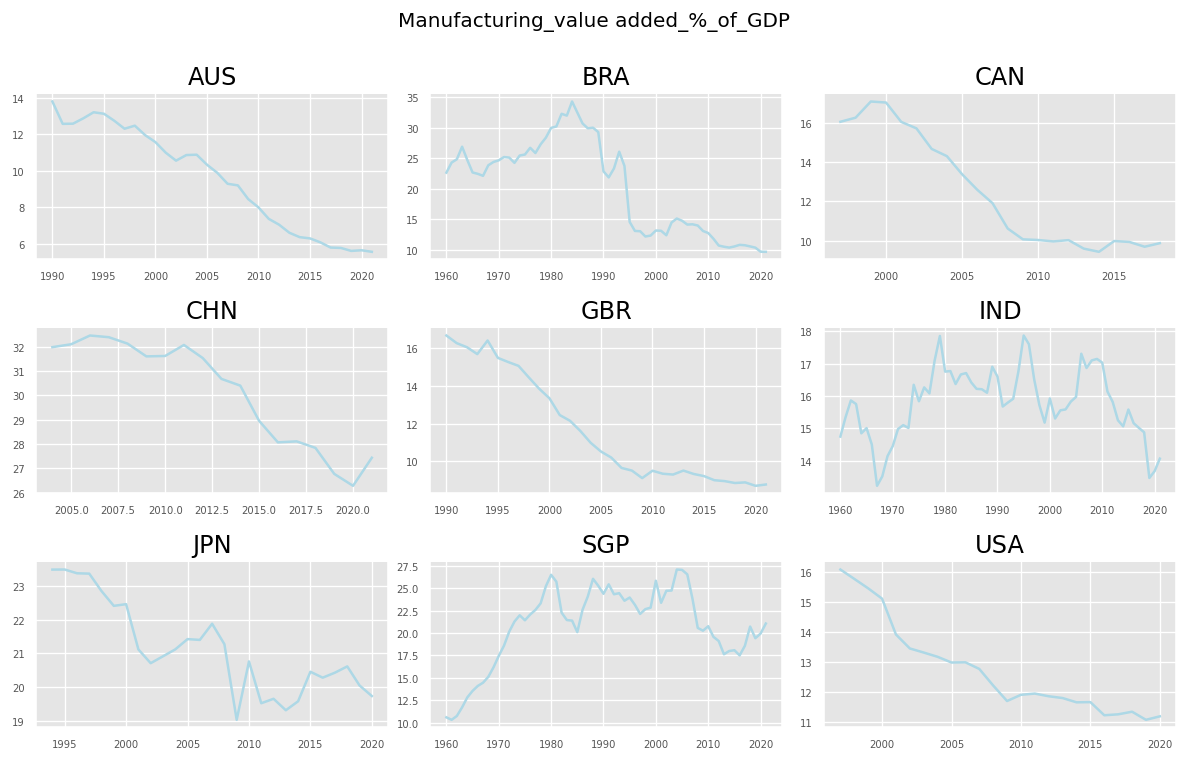

In [ ]:
# for manufaturing
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot('Manufacturing_value added_%_of_GDP',data= manufacture_y[country[i]],color = "lightblue")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.suptitle("Manufacturing_value added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

#### Service

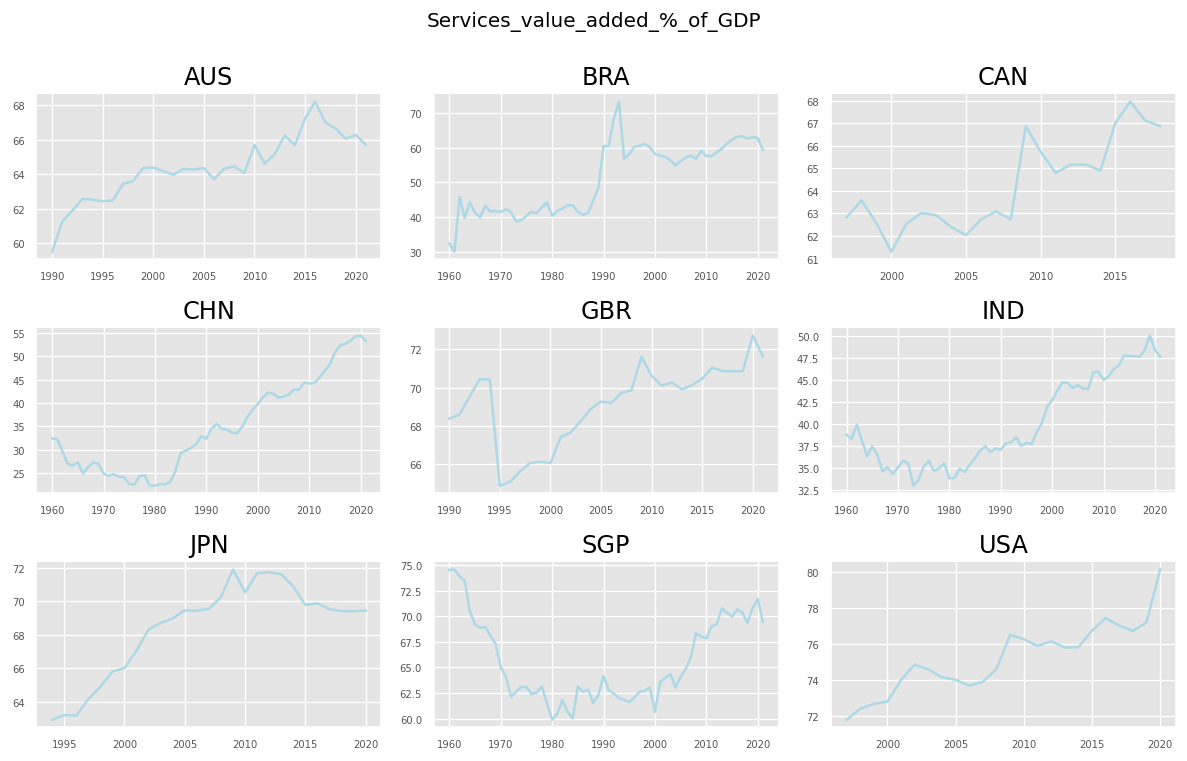

In [ ]:
# for service
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot('Services_value_added_%_of_GDP',data= service_y[country[i]],color = "lightblue")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.suptitle("Services_value_added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

### Stationarity

#### Visualization Inspection

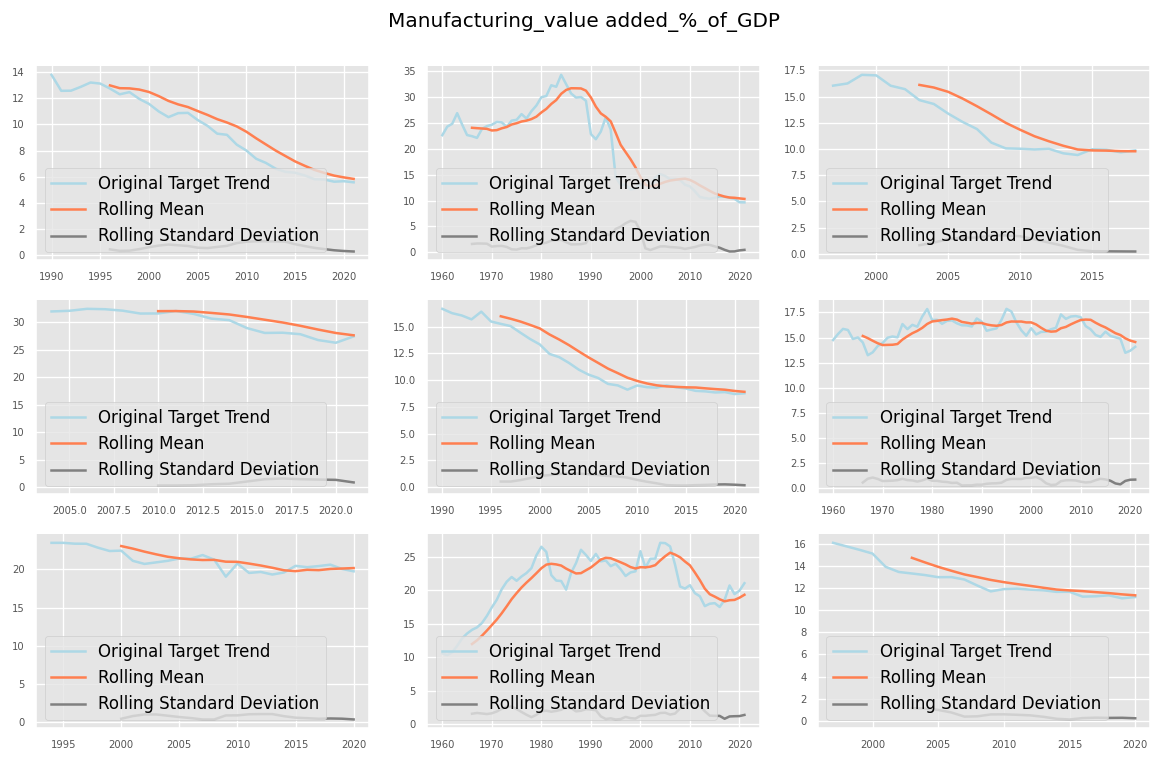

In [ ]:
def vis_stationary(df,title,rolling_num = 7):
  fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
  for i, ax in enumerate(axes.flatten()):
      rolling_mean = df[country[i]].rolling(rolling_num).mean()
      rolling_std = df[country[i]].rolling(rolling_num).std()
      ax.plot(df[country[i]], color="lightblue",label="Original Target Trend")
      ax.plot(rolling_mean, color="coral", label="Rolling Mean")
      ax.plot(rolling_std, color="grey", label = "Rolling Standard Deviation")
      # Decorations
      #ax.seasonal_decompose(df[country],model='additive', period=7)
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=6)
      ax.legend(loc="lower left")

  plt.suptitle(title,y=1.05)
  plt.tight_layout()

  plt.show()


vis_stationary(manufacture_y, "Manufacturing_value added_%_of_GDP")


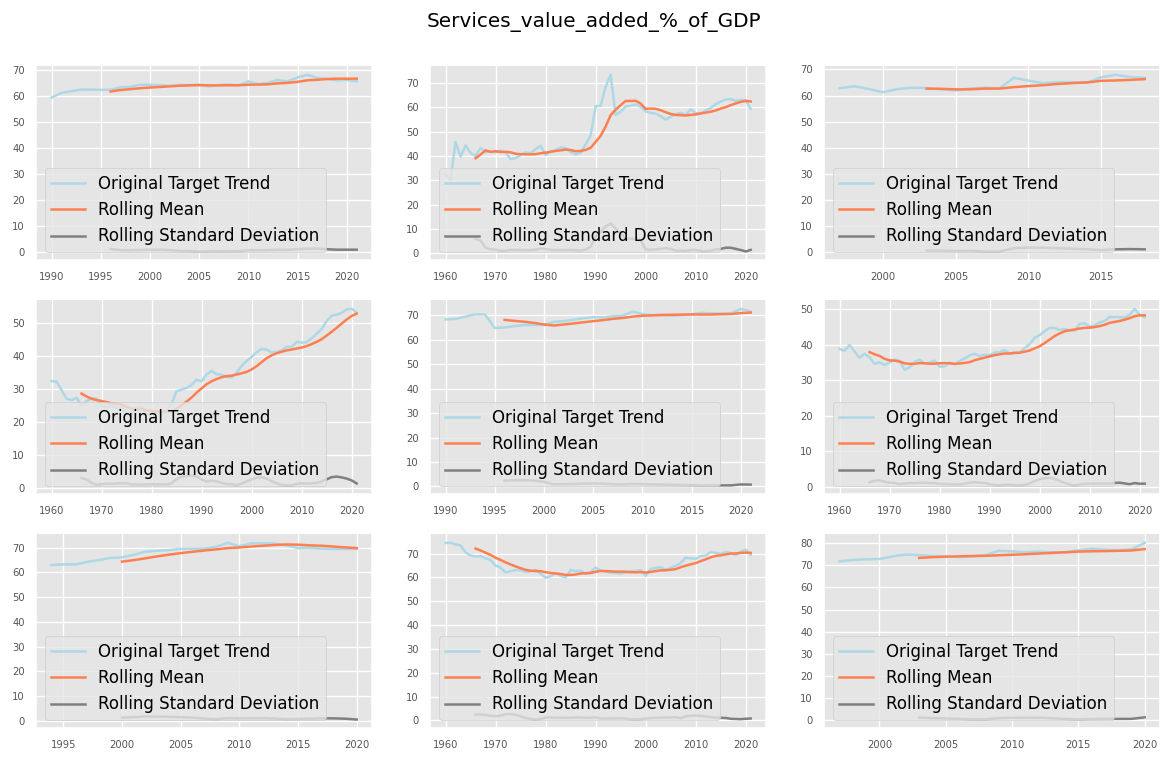

In [ ]:
vis_stationary(service_y, "Services_value_added_%_of_GDP")

### ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Cannot reject Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   
    print("\n")

In [ ]:
for con in country:
  adfuller_test(manufacture_y[con],0.05, con)

    Augmented Dickey-Fuller Test on "AUS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.5292
 No. Lags Chosen       = 0
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.8862. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BRA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.5019
 No. Lags Chosen       = 2
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.8916. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

In [ ]:
for con in country:
  adfuller_test(service_y[con],0.05, con)

    Augmented Dickey-Fuller Test on "AUS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8928
 No. Lags Chosen       = 0
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.0462. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BRA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0224
 No. Lags Chosen       = 0
 Critical value 1%     = -3.542
 Critical value 5%     = -2.91
 Critical value 10%    = -2.593
 => P-Value = 0.2768. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

#### First Order Difference

In [ ]:
diff_manu = {}
diff_ser = {}
for con in country:
  diff_manu[con] = manufacture_y[con].diff().dropna()
  diff_ser[con] = service_y[con].diff().dropna()

for con in country:
  adfuller_test(diff_manu[con],0.05, con)


    Augmented Dickey-Fuller Test on "AUS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3161
 No. Lags Chosen       = 0
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BRA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.8523
 No. Lags Chosen       = 1
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

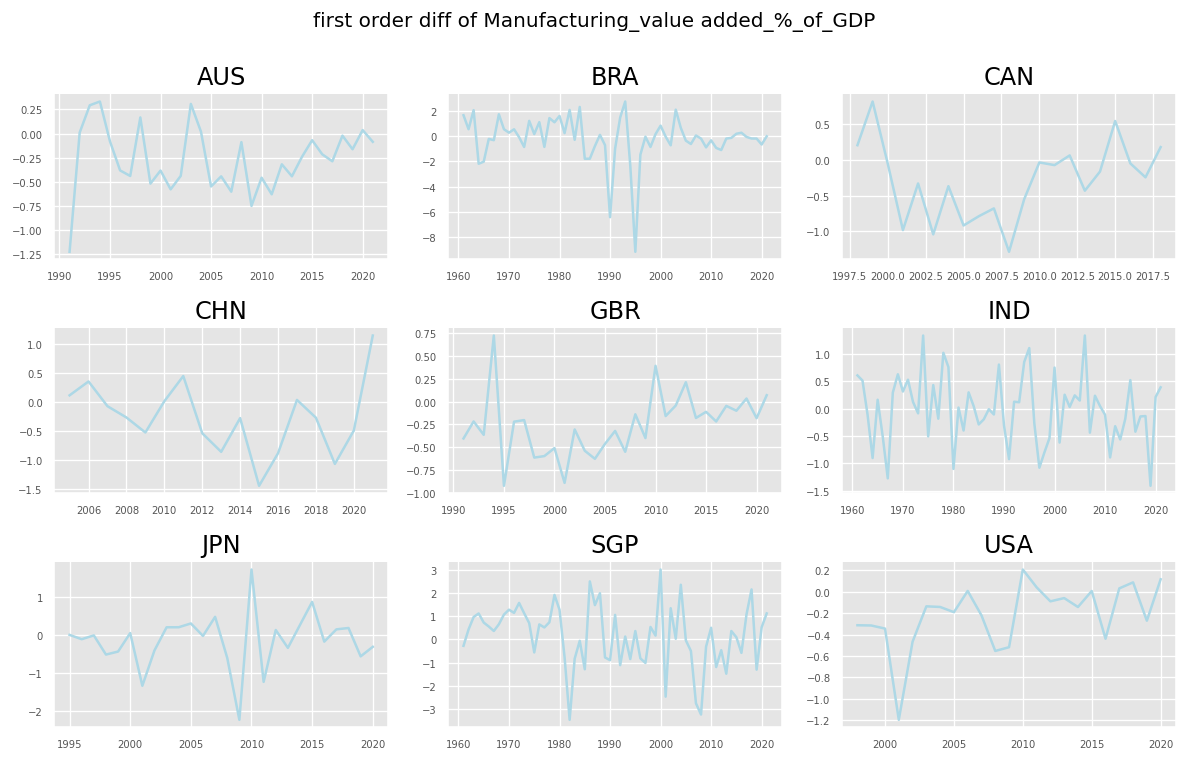

In [ ]:
# for manufacture
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot("Manufacturing_value added_%_of_GDP",data= diff_manu[country[i]],color = "lightblue")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.suptitle("first order diff of Manufacturing_value added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
for con in country:
  adfuller_test(diff_ser[con],0.05, con)

    Augmented Dickey-Fuller Test on "AUS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.687
 No. Lags Chosen       = 0
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BRA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6695
 No. Lags Chosen       = 3
 Critical value 1%     = -3.551
 Critical value 5%     = -2.914
 Critical value 10%    = -2.595
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 T

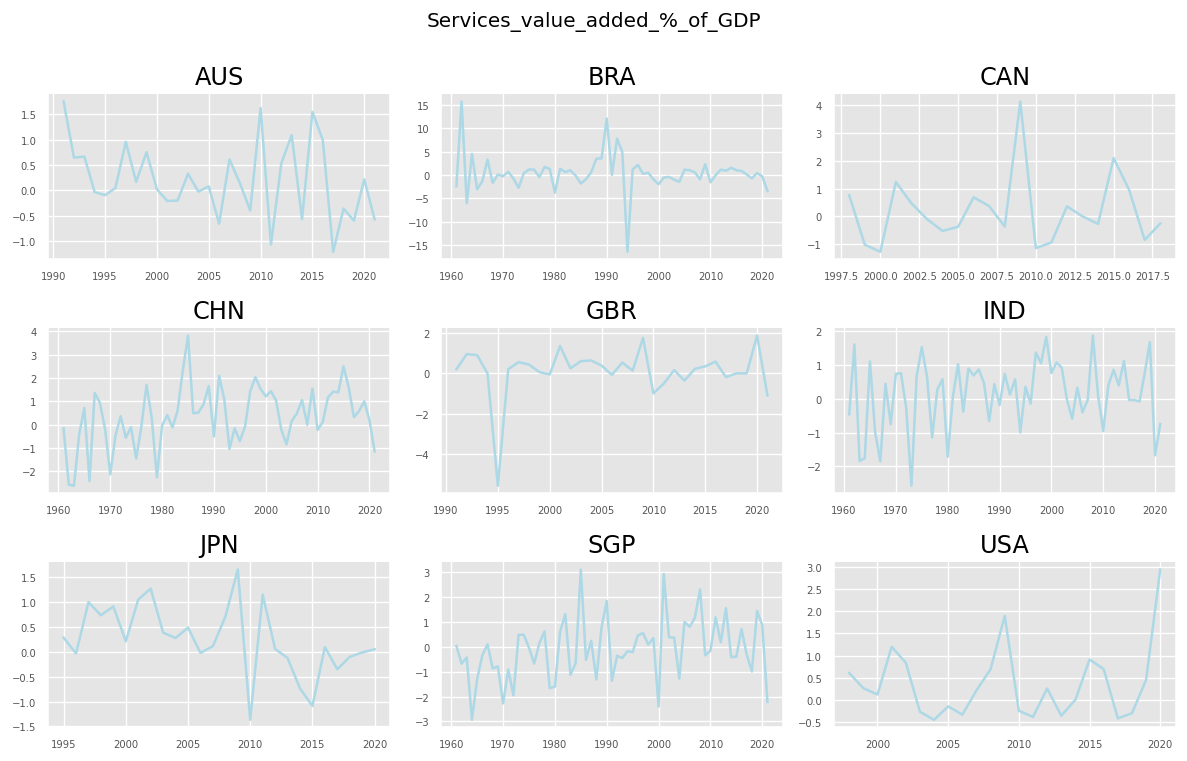

In [ ]:
# for service
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot('Services_value_added_%_of_GDP',data= diff_ser[country[i]],color = "lightblue")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.suptitle("Services_value_added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

#### Second order difference 

In [ ]:
adfuller_test(diff_manu['CAN'].diff().dropna(),0.05, "CAN")
# second-diff of Canada manufature is stationary

adfuller_test(diff_manu['GBR'].diff().dropna(),0.05, "GBR")
# second-diff of Germany manufature is stationary

adfuller_test(diff_ser['CAN'].diff().dropna(),0.05, "CAN")
# second-diff of Canada service still non-stationary, therefore disgard analysis of Canada in service part

    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3357
 No. Lags Chosen       = 8
 Critical value 1%     = -4.223
 Critical value 5%     = -3.189
 Critical value 10%    = -2.73
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GBR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.6285
 No. Lags Chosen       = 1
 Critical value 1%     = -3.689
 Critical value 5%     = -2.972
 Critical value 10%    = -2.625
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

### Autocorrelation

In [ ]:
print("=======Manufaturing Autocorrelation=======")
for con in country:
  autocorrelation_lag1 =  manufacture[con]["Manufacturing_value added_%_of_GDP"].autocorr(lag=1)
  print(f"One Year Lag of {con}: ", autocorrelation_lag1)
print("\n")
print("=======Service Autocorrelation=======")
for con in country:
  autocorrelation_lag1 =  service[con]["Services_value_added_%_of_GDP"].autocorr(lag=1)
  print(f"One Year Lag of {con}: ", autocorrelation_lag1)

=======Manufaturing Autocorrelation=======
One Year Lag of AUS:  0.9924885267251866
One Year Lag of BRA:  0.9713533862305337
One Year Lag of CAN:  0.9826457423593227
One Year Lag of CHN:  0.9586851566326937
One Year Lag of GBR:  0.9932969057027103
One Year Lag of IND:  0.833862559640759
One Year Lag of JPN:  0.8470591152229123
One Year Lag of SGP:  0.9531902208498707
One Year Lag of USA:  0.983625139802899


=======Service Autocorrelation=======
One Year Lag of AUS:  0.9184916714686304
One Year Lag of BRA:  0.9220446439165608
One Year Lag of CAN:  0.8013451362151703
One Year Lag of CHN:  0.9919853158856025
One Year Lag of GBR:  0.8225060920740754
One Year Lag of IND:  0.9803764202326624
One Year Lag of JPN:  0.969898405687662
One Year Lag of SGP:  0.9539463218877783
One Year Lag of USA:  0.8938524099568661


### Model Fitting

#### Train-test split

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

In [ ]:
def split_train_test(df, percentage = 0.8):
  train = df[:int(percentage*(len(df)))]
  valid = df[int(percentage*(len(df))):]
  return train, valid

train_manu = {}
valid_manu = {}
train_ser = {}
valid_ser = {}
for con in country:
  train_manu[con], valid_manu[con]= split_train_test(manufacture_y[con])
  train_ser[con], valid_ser[con]= split_train_test(service_y[con])

In [ ]:
valid_manu['AUS']

,Manufacturing_value added_%_of_GDP
Year,
2015,6.299997
2016,6.085499
2017,5.798737
2018,5.777272
2019,5.615118
2020,5.651114
2021,5.565624


#### ACF and PACF plot

In [ ]:
train_manu["CHN"]["Manufacturing_value added_%_of_GDP"].shape[0]//2-1

6

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsap

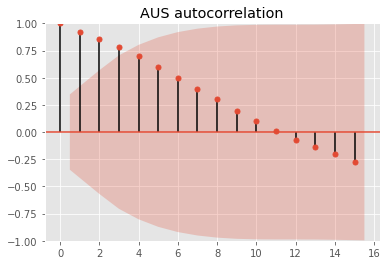

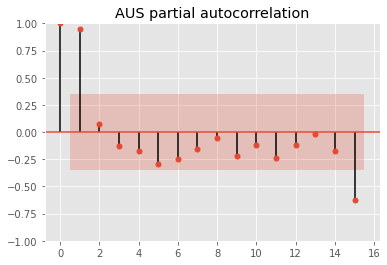

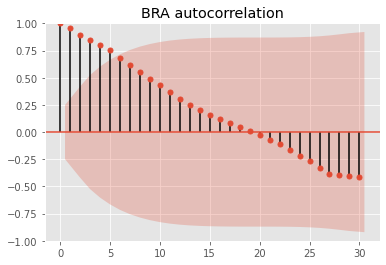

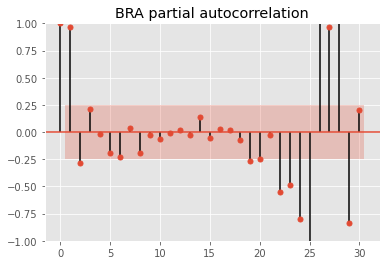

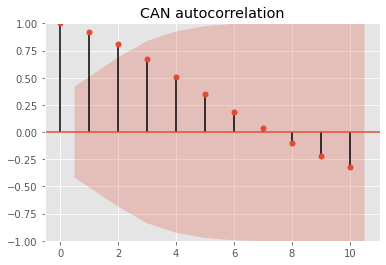

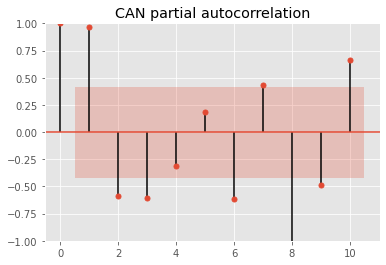

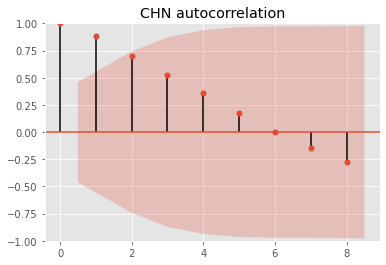

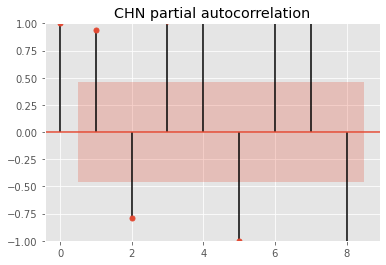

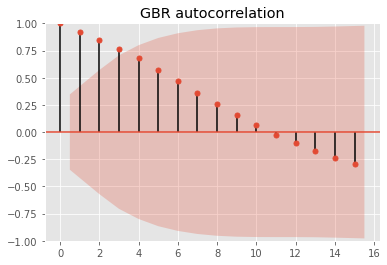

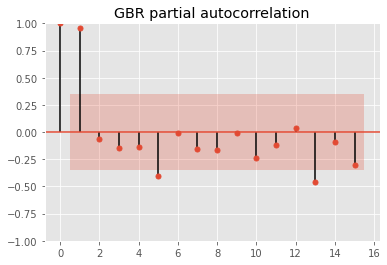

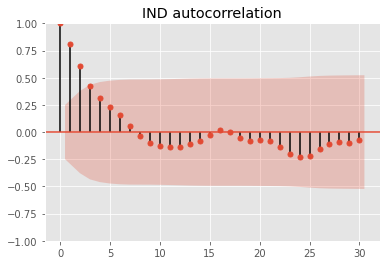

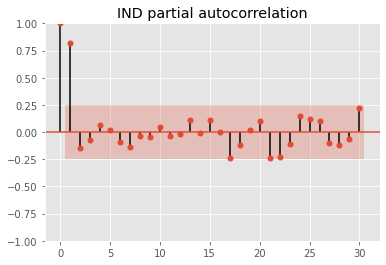

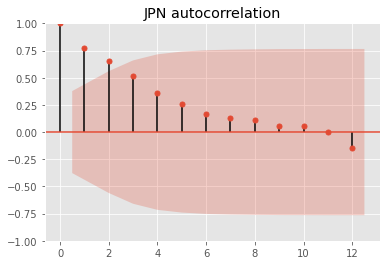

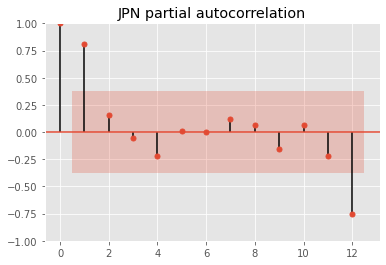

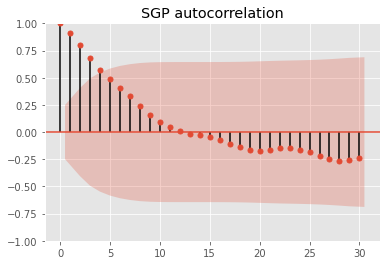

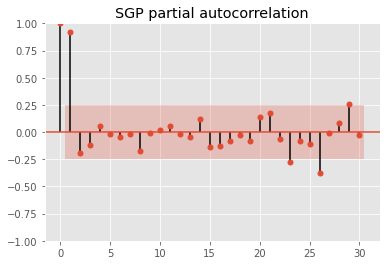

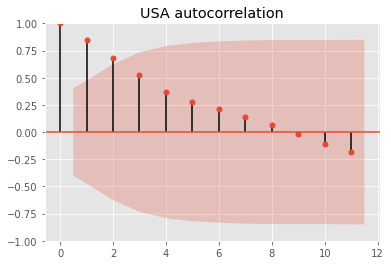

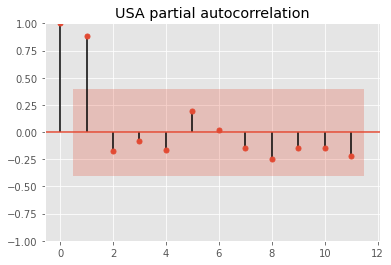

In [ ]:
def show_acf_pacf(df, con, val):
  lag = df[con][val].shape[0]//2 - 1
  plot_acf(df[con][val],lags = lag,title = con + " autocorrelation")
  plot_pacf(df[con][val],lags = lag,title = con + " partial autocorrelation")

for con in country:
  show_acf_pacf(manufacture_y, con, "Manufacturing_value added_%_of_GDP")

#### ARIMA

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima
manu_model = {}
ser_model = {}
def set_auto_arima(train, con, manu, dic):
  model = auto_arima(train[con][manu],trace=True, error_action='ignore', suppress_warnings=True)
  model.fit(train[con][manu])
  dic[con] = model

  # forecast = model.predict(n_periods=len(test))
  # forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction']) 
print("======= Auto ARIMA for manufacture=======")
for con in country:
  print(f"======={con}=======")
  set_auto_arima(train_manu,con, "Manufacturing_value added_%_of_GDP",manu_model)
  print("\n")

print("======= Auto ARIMA for service=======")
for con in country:
  print(f"======={con}=======")
  set_auto_arima(train_ser,con, "Services_value_added_%_of_GDP",ser_model)
  print("\n")

======= Auto ARIMA for manufacture=======
=======AUS=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23.644, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25.159, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25.036, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34.674, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27.035, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.232 seconds


=======BRA=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=208.790, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=208.002, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=207.592, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=206.645, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=206.382, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=208.559, 

#### Forecasting

In [ ]:
forecast = manu_model['CHN'].predict(n_periods=len(valid_manu['CHN'])).reset_index().drop(['index'],axis = 1)
forecast['Year'] = valid_manu['CHN'].index
forecast.set_index(['Year'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


,0
Year,
2018,28.106414
2019,28.106414
2020,28.106414
2021,28.106414


In [ ]:
forecast_manu = {}
forecast_ser = {}
def forecast_arima(model, valid,con, manu):
  forecast = model.predict(n_periods=len(valid)).reset_index().drop(['index'],axis = 1)
  forecast['Year'] = valid.index
  forecast = forecast.set_index(['Year'])
  forecast = forecast.rename(columns={0: "Prediction"})
  manu[con] = forecast

for con in country:
  forecast_arima(manu_model[con],valid_manu[con],con, forecast_manu)
  forecast_arima(ser_model[con],valid_ser[con],con, forecast_ser)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is availa

In [ ]:
train_manu['USA']

,Manufacturing_value added_%_of_GDP
Year,
1997,16.087177
1998,15.774325
1999,15.459067
2000,15.115075
2001,13.919309
2002,13.452878
2003,13.316512
2004,13.174181
2005,12.983320


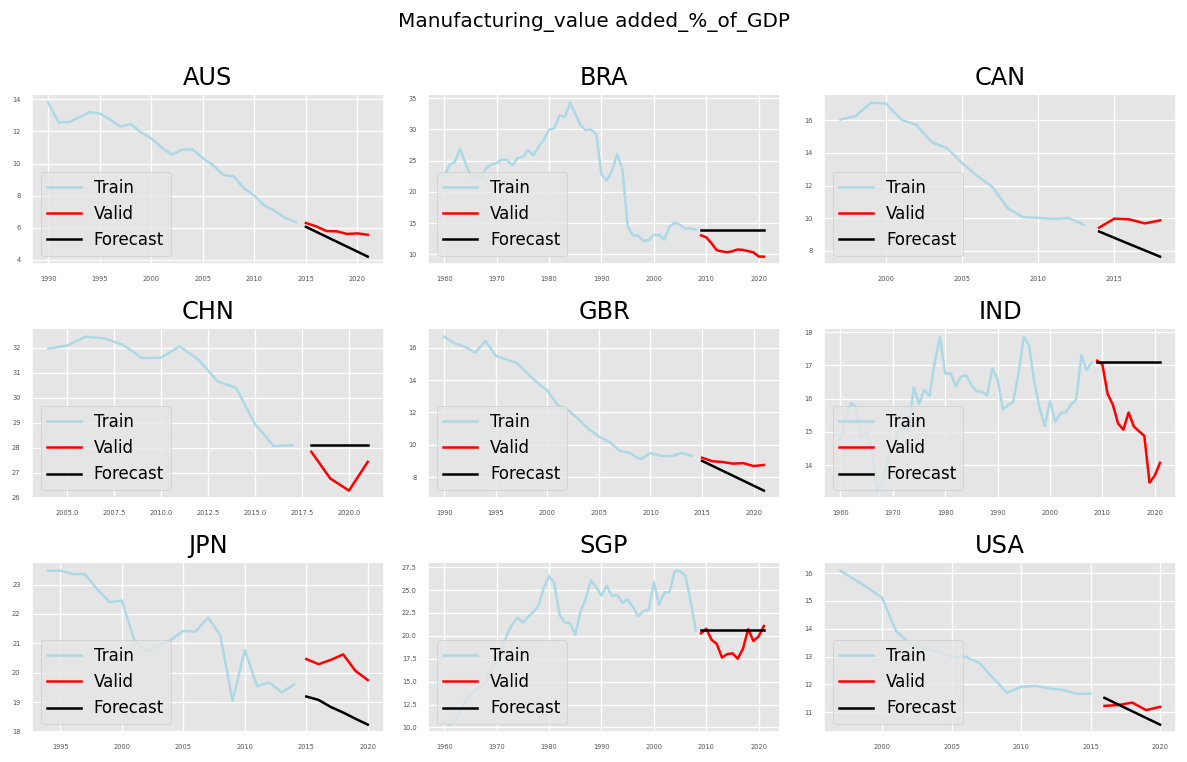

In [ ]:
# for manufaturing
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_manu[country[i]],color = "lightblue",label="Train")
    ax.plot(valid_manu[country[i]],color = "red",label="Valid")
    ax.plot(forecast_manu[country[i]],color = "black",label="Forecast")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)
    ax.legend(loc="lower left")

plt.suptitle("Manufacturing_value added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

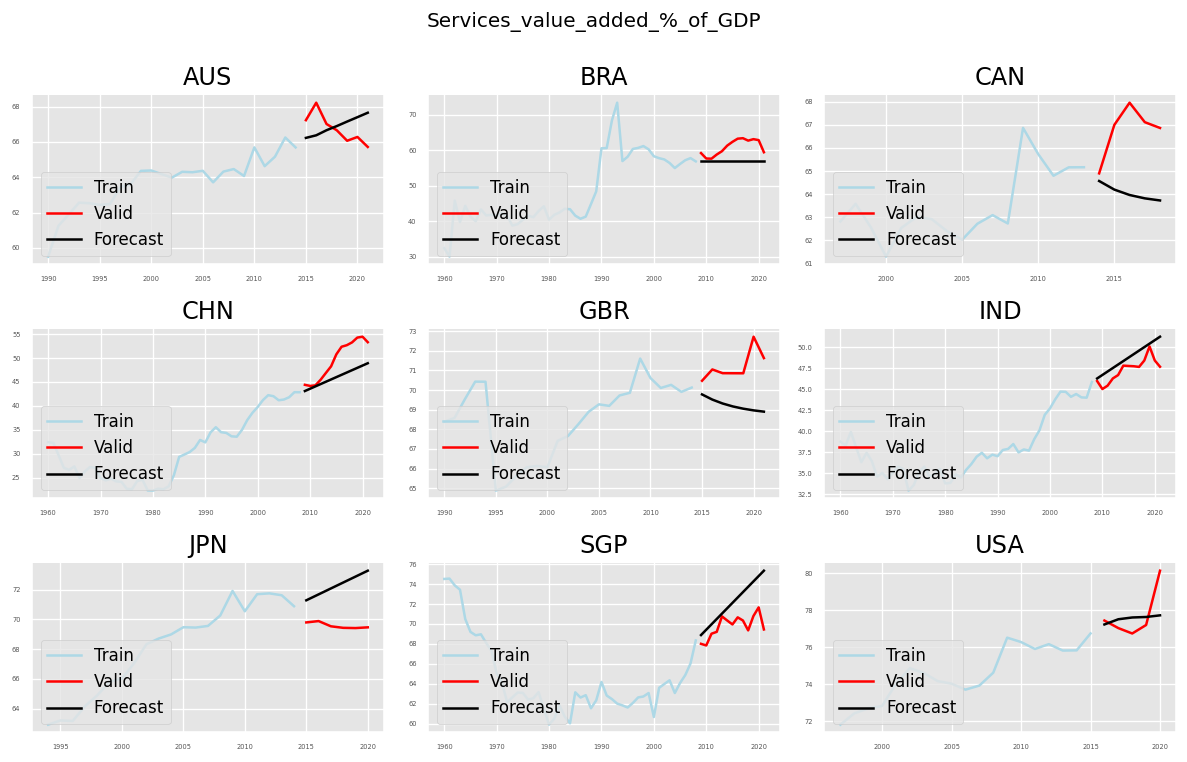

In [ ]:
# for service
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_ser[country[i]],color = "lightblue",label="Train")
    ax.plot(valid_ser[country[i]],color = "red",label="Valid")
    ax.plot(forecast_ser[country[i]],color = "black",label="Forecast")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)
    ax.legend(loc="lower left")

plt.suptitle("Services_value_added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

#### RMSE

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
for con in country:
  rms = sqrt(mean_squared_error(valid_manu[con],forecast_manu[con]))
  print(f"RMSE for {con} manufacture:", rms)
  rmse = sqrt(mean_squared_error(valid_ser[con],forecast_ser[con]))
  print(f"RMSE for {con} service:", rmse)
  print("\n")

RMSE for AUS manufacture: 0.8016826216642
RMSE for AUS service: 1.2422391420039962


RMSE for BRA manufacture: 3.2476412564559145
RMSE for BRA service: 4.543213768589233


RMSE for CAN manufacture: 1.5095893709371118
RMSE for CAN service: 2.9859564927923303


RMSE for CHN manufacture: 1.1840439771569278
RMSE for CHN service: 4.229986863049597


RMSE for GBR manufacture: 0.9332455582275055
RMSE for GBR service: 2.168863784921051


RMSE for IND manufacture: 2.137126570041298
RMSE for IND service: 1.6925648492354657


RMSE for JPN manufacture: 1.5578646348369984
RMSE for JPN service: 2.814938305792673


RMSE for SGP manufacture: 1.7621949688714702
RMSE for SGP service: 2.773243440924764


RMSE for USA manufacture: 0.3653284119905748
RMSE for USA service: 1.187005323015347




## Multivariate Time Series Analysis

#### Missing Data Imputation

In [ ]:
# only reserve the value with actual target value for each country
for con in country:
  manufacture[con] = manufacture[con][~manufacture[con]['Manufacturing_value added_%_of_GDP'].isna()]
  manufacture[con].index = manufacture[con]['Year']
  service[con] = service[con][~service[con]['Services_value_added_%_of_GDP'].isna()]
  service[con].index = service[con]['Year']

In [ ]:
# interpolate imputation
for con in country:
  manufacture[con] = manufacture[con].interpolate(option='spline')
  service[con] = service[con].interpolate(option='spline')

In [ ]:
# check each country's variable missing rate
def percent_miss(df):
  percent_missing = df.isnull().sum() * 100 / len(df)
  print(percent_missing)

for con in country:
  print(f"=======Manufature {con}=======")
  percent_miss(manufacture[con])
  print(f"=======Service {con}=======")
  percent_miss(service[con])
  

=======Manufature AUS=======
Year                                                                                     0.0
Employment_in_industry_male                                                              0.0
High_technology_exports                                                                  0.0
Research_development_expenditure                                                         0.0
Researchers in R&D                                                                       0.0
Population_labor_rate                                                                    0.0
Population_density                                                                       0.0
Foreign_direct_investment                                                                0.0
Net_trade_in_goods_services                                                              0.0
Air_freight_million_ton_km                                                               0.0
Container_port_traffic_TEU               

In [ ]:
# drop columns which are all nan
for con in country:
  manufacture[con] = manufacture[con].dropna(axis=1, how='all')
  service[con] = service[con].dropna(axis = 1, how = 'all')

In [ ]:
# all left missing value are starting from the very beginning, therefore using NOCB to fill them
for con in country:
  manufacture[con] = manufacture[con].bfill()
  service[con] = service[con].bfill()

#### Time Series Visualization

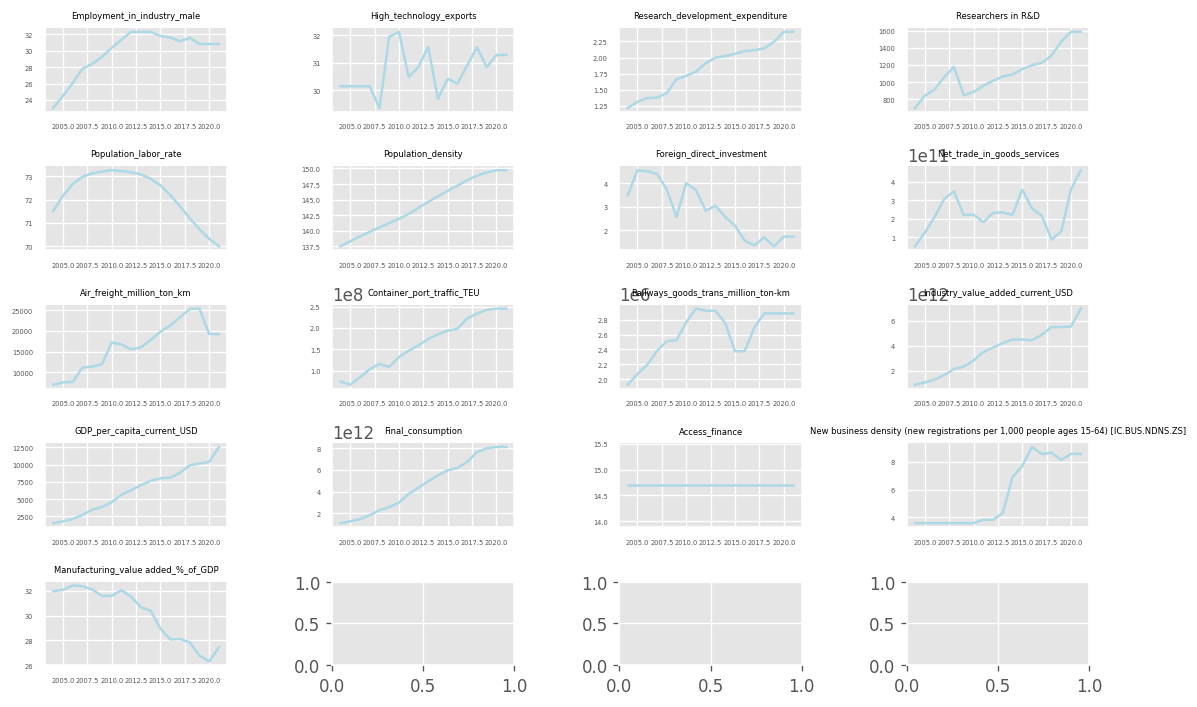

In [ ]:
# can change the argument to plot different country and type
def plot_time_series(df, var_num):
  fig, axes = plt.subplots(var_num//4 + 1,4, dpi=120, figsize=(10,6))
  for i, ax in enumerate(axes.flatten()):
      if (i >= var_num - 1): break
      data = df[df.columns[i+1]]
      ax.plot(df[df.columns[0]],data, color = "lightblue",ms = 1)
      # Decorations
      ax.set_title(df.columns[i+1],fontsize=5)
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=4)

  plt.tight_layout()
  plt.show()
plot_time_series(manufacture['CHN'],len(manufacture['CHN'].columns))

#### ADF test

Using IND, CHN and USA as baseline model checking.

In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
def adfuller_simple(series, name,signif=0.05):
  r = adfuller(series, autolag='AIC')
  output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
  p_value = output['pvalue'] 
  if p_value <= signif: 
    print(f"{name}: TRUE")
    return True
  else:
    print(f"{name}: FALSE")
    return False

In [ ]:
def adf_testing(df,con,is_manu):
  adf = df.drop(["Year"], axis = 1)
  if is_manu:
    print(f"=======Manufacture {con}=======")
  else:
    print(f"=======Service {con}=======")
  for name, column in adf.iteritems():
    adfuller_simple(column, name=column.name)

In [ ]:
for con in country:
  adf_testing(manufacture[con],con,True)
  print("\n")
  adf_testing(service[con],con,False)
  print("\n")

=======Manufacture AUS=======
Employment_in_industry_male: TRUE
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: FALSE


=======Service AUS=======
Employment_in_services_male: FALSE
Urban_population_growth: FALSE
Net_trade_in_goods_services: FALSE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: FALSE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Employment_in_industry_male: FALSE
High_technology_exports: FALSE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: FALSE
Foreign_direct_investment: FALSE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: FALSE


=======Service BRA=======
Employment_in_services_male: FALSE
Urban_population_growth: FALSE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: FALSE
Mobile_cellular_subscriptions: FALSE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: FALSE
Population_labor_rate: TRUE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: FALSE

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Primary_completion_rate: TRUE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: TRUE


=======Manufacture CHN=======
Employment_in_industry_male: TRUE
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: TRUE
Foreign_direct_investment: FALSE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: TRUE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: FALSE


=======Service CHN=======
Employment_in_services_male: FALSE
Urban_populatio

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: TRUE
Poverty_headcount_ratio: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: FALSE


=======Manufacture GBR=======
Employment_in_industry_male: FALSE
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: FALSE


=======Service GBR=======
Employment_in_services_male: FALSE
Urban_population_growth: FALSE
Net_trade_i

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Employment_in_industry_%_of_total_employment: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Primary_completion_rate: FALSE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: FALSE


=======Manufacture IND=======
Employment_in_industry_male: FALSE
High_technology_exports: TRUE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: TRUE
Foreign_direct_investment: FALSE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufac

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Access_electricity: FALSE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: FALSE
Primary_completion_rate: TRUE
Individuals_using_the_Internet_%_of_population: TRUE
Poverty_headcount_ratio: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: FALSE


=======Manufacture SGP=======
Employment_in_industry_male: FALSE
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: TRUE
Population_density: FALSE
Foreign_direct_investment: FALSE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP:

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Primary_completion_rate: FALSE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: FALSE
Services_value_added_%_of_GDP: FALSE




In [ ]:
# perform first order difference
diff_manu = {}
diff_ser = {}
for con in country:
  diff_manu[con] = manufacture[con].diff().dropna()
  diff_ser[con] = service[con].diff().dropna()

In [ ]:
for con in country:
  adf_testing(diff_manu[con],con,True)
  print("\n")
  adf_testing(diff_ser[con],con,False)
  print("\n")

=======Manufacture AUS=======
Employment_in_industry_male: TRUE
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_value added_%_of_GDP: TRUE


=======Service AUS=======
Employment_in_services_male: FALSE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: FALSE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Poverty_headcount_ratio: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Services_value_added_%_of_GDP: TRUE


=======Manufacture BRA=======
Employment_in_industry_male: TRUE
High_technology_exports: FALSE
Research_development_expenditure: TRUE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: TRUE


=======Service BRA=======
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Sec

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: FALSE
Primary_completion_rate: TRUE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: TRUE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: TRUE


=======Manufacture CAN=======
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consum

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


School_enrollment_tertiary: TRUE
Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
Primary_completion_rate: FALSE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: FALSE


=======Manufacture CHN=======
Employment_in_industry_male: FALSE
High_technology_exports: TRUE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: TRUE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FAL

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Employment_in_industry_%_of_total_employment: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Primary_completion_rate: TRUE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: TRUE
Poverty_headcount_ratio: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: TRUE


=======Manufacture GBR=======
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_va

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
Primary_completion_rate: TRUE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: TRUE
Poverty_headcount_ratio: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Services_value_added_%_of_GDP: TRUE


=======Manufacture IND=======
Employment_in_industry_male: FALSE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
Primary_completion_rate: TRUE
Individuals_using_the_Internet_%_of_population: TRUE
Poverty_headcount_ratio: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: TRUE


=======Manufacture SGP=======
Employment_in_industry_male: FALSE
High_technology_exports: FALSE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: FALSE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: TRUE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


School_enrollment_tertiary: FALSE
Population_labor_rate: TRUE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: FALSE
GDP_per_capita_current_USD: TRUE
Final_consumption: FALSE
Primary_completion_rate: TRUE
Educational_attainment: TRUE
Individuals_using_the_Internet_%_of_population: TRUE
Poverty_headcount_ratio: TRUE
Services_value_added_%_of_GDP: TRUE




In [ ]:
# perform first order difference
diff2_manu = {}
diff2_ser = {}
for con in country:
  diff2_manu[con] = diff_manu[con].diff().dropna()
  diff2_ser[con] = diff_ser[con].diff().dropna()

In [ ]:
for con in country:
  adf_testing(diff2_manu[con],con,True)
  print("\n")
  adf_testing(diff2_ser[con],con,False)
  print("\n")

=======Manufacture AUS=======
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_value added_%_of_GDP: TRUE


=======Service AUS=======
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2





=======Manufacture BRA=======
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: TRUE




/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


=======Service BRA=======
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: TRUE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
Primary_completion_rate: TRUE
Educational_attainment: TRUE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: TRUE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: TRUE


=======Manufacture CAN=======
Employment_in_industry_male: TRUE
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_di

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_value added_%_of_GDP: TRUE


=======Service CHN=======
Employment_in_services_male: TRUE
Urban_population_growth: FALSE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: FALSE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: FALSE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: TRUE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: FALSE
Final_consumption: TRUE
Primary_completion_rate: TRUE
Educational_attainment: TRUE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
S

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_value added_%_of_GDP: TRUE


=======Service GBR=======
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: TRUE
Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
Primary_completion_rate: TRUE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: TRUE
Poverty_headcount_ratio: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Services

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: TRUE


=======Service JPN=======
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: FALSE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: TRUE
Population_labor_rate: FALSE
Population_density: TRUE
Access_electricity: FALSE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
Primary_completion_rate: TRUE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: TRUE
New business density (new 

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: TRUE
Manufacturing_value added_%_of_GDP: FALSE


=======Service USA=======
Employment_in_services_male: TRUE
Urban_population_growth: FALSE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: FALSE
Mobile_cellular_subscriptions: FALSE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: FALSE
Population_labor_rate: FALSE
Population_density: TRUE
Access_electricity: FALSE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: FALSE
Final_consumption: TRUE
Primary_completion_rate: TRUE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: TRUE
Services_value_added_%_of_GDP: TRUE




Will use second order difference. And since target value of **Manufacture USA** and **Service CAN** are non-stationary, we will not take this analysis into consideration.

In [ ]:
# drop the variable that are still non-stationary after seconde order diff
def drop_non_stat(df):
  adf = df.drop(["Year"], axis = 1)
  for name, column in adf.iteritems():
    if not adfuller_simple(column, name=column.name):
      adf = adf.drop([column], axis = 1)
  return adf

In [ ]:
def drop_non_stat(df):
  adf = df.drop(["Year"], axis = 1)
  for name, column in adf.iteritems():
      if not adfuller_simple(column, name=column.name):
        adf = adf.drop([column.name], axis = 1)
      else:
        continue
  return adf

In [ ]:
df_manu = {}
df_ser = {}
for con in country:
  df_manu[con] = drop_non_stat(diff2_manu[con])
  df_ser[con] = drop_non_stat(diff2_ser[con])

Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_value added_%_of_GDP: TRUE
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_cur

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: TRUE
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: TRUE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
Primary_completion_rate: TRUE
Educational_attainment: TRUE
Indivi

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Services_value_added_%_of_GDP: TRUE
Employment_in_industry_male: TRUE
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: FALSE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: TRUE
Employment_in_services_male: TRUE
Urban_population_growth: FALSE
Net_trade_in_goods_services: FALSE
Foreign_direct_investment: FALSE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: FALSE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: FALSE
Industry_value_added_current_USD: FALSE
Employment_in_ind

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_value added_%_of_GDP: TRUE
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: TRUE
Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumpt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Access_finance: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: TRUE
Employment_in_services_male: TRUE
Urban_population_growth: FALSE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: TRUE
Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: FALSE
GDP_per_capita_cur

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Services_value_added_%_of_GDP: TRUE
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: TRUE
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Individuals_using_the_Internet_%_of_population: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: TRUE
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: FALSE
Population_density: TRUE
Foreign_direct_investment: FALSE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: TRUE
Manufacturing_value added_%_of_GDP: FALSE
Employment_in_services_male: TRUE
Urban_population_growth: FALSE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: FALSE
Mobile_cellular_subscriptions: FALSE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: FALSE
Population_labor_rate: FALSE
Population_density: TRUE
Access_electricity: FALSE
Industr

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


#### VAR Model Fitting

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [ ]:
def split_train_test(df, percentage = 0.8):
  train = df[:int(percentage*(len(df)))]
  valid = df[int(percentage*(len(df))):]
  return train, valid

In [ ]:
train_manu = {}
valid_manu = {}
train_ser = {}
valid_ser = {}
for con in country:
  train_manu[con], valid_manu[con] = split_train_test(df_manu[con])
  train_ser[con], valid_ser[con] = split_train_test(df_ser[con])

In [ ]:
train_manu['USA']

,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_density,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Final_consumption
Year,,,,,,,,,,
1999,-0.000004,0.000000,0.02146,-107.614258,-0.001201,-3.184100e+10,1255.199219,0.000000e+00,-2849.0,1.027910e+11
2000,-0.029995,0.000000,0.03350,-26.903320,-0.016896,-2.419300e+10,1345.476953,0.000000e+00,-18480.0,7.925300e+10
2001,-0.350002,0.000000,-0.05963,40.142334,-0.024633,1.231920e+11,-5127.182781,-9.924240e+05,15123.0,-1.623970e+11
2002,-0.449997,0.000000,-0.10855,14.319824,-0.016406,-6.960900e+10,3877.523000,3.361738e+06,-68345.0,-2.437700e+10
2003,0.699997,0.000000,0.09433,156.461426,-0.018937,-1.529200e+10,3020.754000,6.432800e+05,-11925.0,1.095600e+11
2004,0.360001,0.000000,-0.06741,-347.087158,0.023426,-3.899700e+10,-1406.303000,-8.004500e+05,120154.0,1.043840e+11
2005,-0.139999,0.000000,0.07666,58.934082,0.001521,8.878000e+09,-3337.044000,1.384067e+06,-45116.0,5.046100e+10
2006,0.380001,0.000000,0.02613,109.935303,0.016592,5.870800e+10,2616.728000,-1.197308e+06,106788.0,-2.811700e+10
2007,-0.650002,0.000000,0.03330,-88.489502,-0.001312,9.952900e+10,-1788.407000,1.543745e+06,-231907.0,-2.415900e+10


In [ ]:
# select the order of model
model_manu = {}
model_ser = {}
for con in country:
  model = VAR(endog=train_manu[con])
  res = model.fit()
  model_manu[con] = res
  model = VAR(endog=train_ser[con])
  res = model.fit()
  model_ser[con] = res

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, f

In [ ]:
model_manu['AUS']

#### Forecasting

In [ ]:
forecast_manu = {}
forecast_ser = {}
def forecast_var(model, train,valid,con, manu):
  forecast = model.forecast(train.values, steps = len(valid))
  df_forecast = pd.DataFrame(data = forecast,columns = train.columns,index = valid.index)
  manu[con] = df_forecast

for con in country:
  forecast_var(model_manu[con],train_manu[con], valid_manu[con],con, forecast_manu)
  forecast_var(model_ser[con],train_ser[con], valid_ser[con],con, forecast_ser)

In [ ]:
forecast_manu["USA"]

,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_density,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Final_consumption
Year,,,,,,,,,,
2016,0.054103,-1.892117,0.047981,282.687180,-0.012509,1.354738e+11,-3315.373154,-7.538273e+06,240146.489451,-2.822078e+11
2017,-0.709616,1.634130,-0.227592,-427.774202,-0.060006,-7.237360e+10,4275.176780,1.051683e+07,-35928.763454,1.242032e+11
2018,1.176799,0.887123,0.174095,403.135502,0.018294,-2.524247e+11,2400.130246,-2.158926e+06,43638.388385,2.756292e+11
2019,-0.493411,-1.078991,-0.094346,-19.850959,-0.050327,3.911066e+11,-5305.727673,-4.952744e+06,-100805.463820,-4.332729e+11
2020,0.351147,2.848122,-0.076210,-353.622069,0.010389,-2.872549e+11,4008.474681,9.646200e+06,101561.514286,3.846144e+11


#### RMSE Evaluation

In [ ]:
for con in country:
  if con != "USA": 
    rms = sqrt(mean_squared_error(valid_manu[con]["Manufacturing_value added_%_of_GDP"],forecast_manu[con]["Manufacturing_value added_%_of_GDP"]))
    print(f"RMSE for {con} manufacture:", rms)
  if con != "CAN": 
    rmse = sqrt(mean_squared_error(valid_ser[con]["Services_value_added_%_of_GDP"],forecast_ser[con]["Services_value_added_%_of_GDP"]))
    print(f"RMSE for {con} service:", rmse)
  print("\n")

RMSE for AUS manufacture: 1.7727987844629738
RMSE for AUS service: 1.8330529070188886


RMSE for BRA manufacture: 16831092758521.006
RMSE for BRA service: 2.8327490568073137


RMSE for CAN manufacture: 0.3659435273943903


RMSE for CHN manufacture: 1.730367909028381
RMSE for CHN service: 0.8073430691886084


RMSE for GBR manufacture: 0.26048316699048735
RMSE for GBR service: 4.04517574443616


RMSE for IND manufacture: 5.368125038878333
RMSE for IND service: 29.444601381546224


RMSE for JPN manufacture: 1.9572588172280716
RMSE for JPN service: 1.033740476156446


RMSE for SGP manufacture: 265.734486061457
RMSE for SGP service: 3.1925683830462632


RMSE for USA service: 1.1608696608219207


